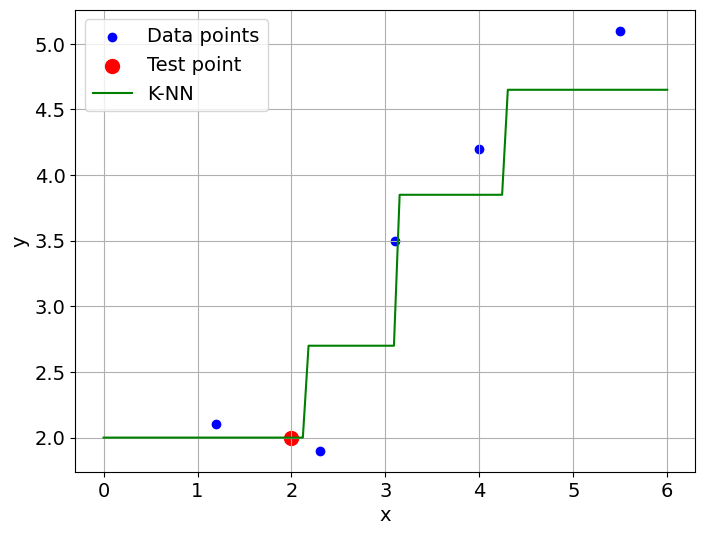

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor

x = np.array([1.2, 2.3, 3.1, 4.0, 5.5]).reshape(-1, 1)
y = np.array([2.1, 1.9, 3.5, 4.2, 5.1])

xplot = np.linspace(0, 6, 100).reshape(-1, 1)
xtest = np.array([2.0]).reshape(-1, 1)

model = KNeighborsRegressor(n_neighbors=2)
model.fit(x, y)
yhat = model.predict(xtest)
yplot = model.predict(xplot)

plt.figure(figsize=(8, 6))
plt.scatter(x[:,0], y, c='blue', label='Data points')
plt.scatter(xtest[:,0], yhat, c='red', label='Test point', s=100)
plt.plot(xplot[:,0], yplot, c='green', label='K-NN')
plt.grid()
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.legend(fontsize=14)
plt.tick_params(axis='both', labelsize=14) 

In [63]:
def kernel_smoother(xdata, ydata, x, sig, tol=1e-8):
    Dsq = np.sum((xdata[None,:,:] - x[:,None,:])**2, axis=2)
    K = np.exp(-0.5 * Dsq/(sig**2))
    Ksum = K.sum(axis=1, keepdims=True)
    W = K / (Ksum + tol)
    yhat = (W * ydata[None,:]).sum(axis=1)
    return yhat, W


(100, 5)


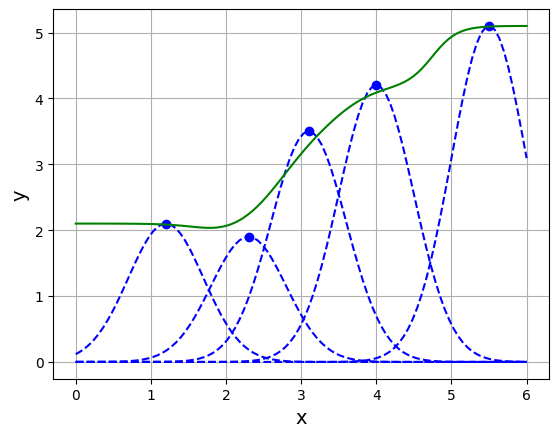

In [ ]:
sig = 0.5
xplot = np.linspace(0, 6, 100)
Dsq = (x[None,:,0] - xplot[:,None])**2
K = np.exp(-0.5 * Dsq/(sig**2))
Ky = K * y[None,:]

yhat, W = kernel_smoother(x, y, xplot[:,None], sig)


plt.plot(xplot, Ky, 'b--')
plt.plot(x, y, 'bo')
plt.plot(xplot, yhat, 'g-')
plt.grid()
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)

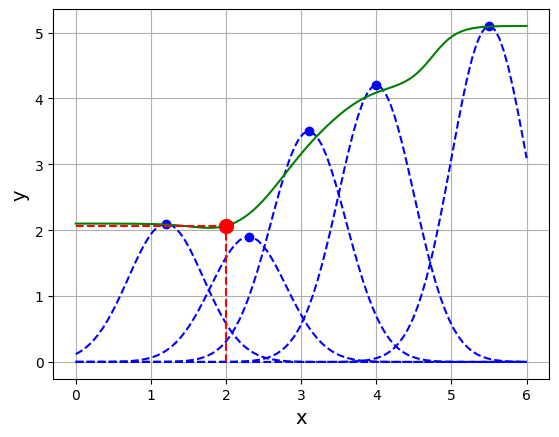

In [78]:
x0 = 2.0
Dsq = (x[:,0] - x0)**2
K = np.exp(-0.5 * Dsq/(sig**2))
alpha = K/np.sum(K)
y0 = np.sum(alpha * y)

import pandas as pd
df = pd.DataFrame({'x': x[:,0], 'y': y, 'K': K, 'alpha': alpha})

plt.plot(xplot, Ky, 'b--')
plt.plot(x, y, 'bo')
plt.plot(xplot, yhat, 'g-')
plt.plot(x0, y0, 'ro', markersize=10)
plt.plot([x0, x0], [0, y0], 'r--')
plt.plot([0, x0], [y0, y0], 'r--')
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.grid()

In [79]:
y0

2.0651916358329734